In [17]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-colorblind')

In [15]:
def relax_dude(size, N, mErr, max_int,V_0):

    ''' 
    I'm not actually a good coder
    but I'm adding a doc string because it's good practice 
    but I am not a good coder so it's useless. 
    
    size: x and y dimesions of the mesh (it's a square)
    N: determs the size of each square in the mesh
    mErr: Error requested 
    max_int: max iterations before exiting the loop and returning the mesh 
    V_0: intial potiental along the bottom edge of the mesh
    '''
    
    ##Intialize the mesh 
    m = np.zeros((size,size))
    m[-1:]=V_0 
    m_new = np.zeros((size,size))
    m_new[-1:]=V_0

    ##Define the error
    Err = np.zeros_like(m)
    avgErr = 100 * mErr
    inter = 0 ##Iteration check to keep us from running away 
    
    ##Iterate until max error reached
    while avgErr > mErr:
        for i in range(0,size):
            for j in range(0,size): 
                ##Try loop to avoid boundry problems 
                try:
                    m_new[i][j]=.25*(m[i-1][j] + m[i][j-1] + m[i][j+1] + m[i+1][j])
                    Err[i][j] = abs(m[i][j]-m_new[i][j])
                except IndexError: 
                    pass
                
        avgErr = np.max(Err)
        m = m_new + np.zeros_like(m)
        inter += 1
        
        if inter > max_int: ##iteration check 
            print("max interation",max_int,"reached" )
            return m_new
        
    print ("Iternations for error of", mErr,":", inter)
    return m_new   

In [19]:
soln = relax_dude(100,100,10**(-2),10000,10)

Iternations for error of 0.01 : 243


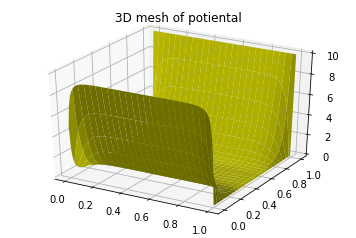

In [21]:
##3D Plot 
##Stolen from HW7 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = np.linspace(0, 1, 100)
y = np.linspace(0, 1, 100)
X,Y = np.meshgrid(x,y)

plt.title("3D mesh of potiental")
ax.plot_surface(X, Y, soln, rstride=4, cstride=4, color='y')

<a list of 12 text.Text objects>

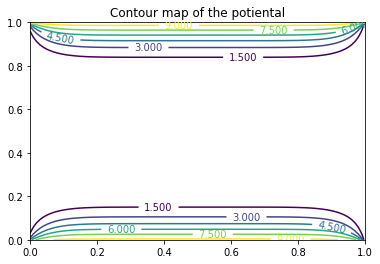

In [23]:
##Contour Map 
##It doesn't count as theft if it's just from the documentation
x = np.linspace(0, 1, 100)
y = np.linspace(0, 1, 100)
X,Y = np.meshgrid(x,y)

plt.figure()
CS = plt.contour(X, Y, soln)
plt.title("Contour map of the potiental")
plt.clabel(CS, inline=1, fontsize=10)

In [26]:
##So my computer can't run this but I'm trusting that it works 
##Sorry if it melts your cpu 

error_lst = [10**(-2),10**(-3),10**(-4),10**(-5),10**(-6),10**(-7)]
for i in error_lst: 
    relax_dude(100,100,i,10000,10)

KeyboardInterrupt: 

In [32]:
def continue_chilling(size, N, mErr, max_int,V_0):

    '''
    Same as relax_dude but with a stepwise initial potienal along the bottom edge
    '''
    
    ##Intialize the mesh 
    m = np.zeros((size,size))
    m_new = np.zeros((size,size))
    for i in range(size):
        if i % 2 == 0:
            m[-1][i]=V_0 
            m_new[-1][i]=V_0
        else: 
            m[-1][i]=-V_0 
            m_new[-1][i]=-V_0

    ##Define the error
    Err = np.zeros_like(m)
    avgErr = 100 * mErr
    inter = 0 ##Iteration check to keep us from running away 
    
    ##Iterate until max error reached
    while avgErr > mErr:
        for i in range(0,size):
            for j in range(0,size): 
                ##Try loop to avoid boundry problems 
                try:
                    m_new[i][j]=.25*(m[i-1][j] + m[i][j-1] + m[i][j+1] + m[i+1][j])
                    Err[i][j] = abs(m[i][j]-m_new[i][j])
                except IndexError: 
                    pass
                
        avgErr = np.max(Err) 
        ##Realized I changed it to a max instead of an avg without changing the varaible name
        ##Oh well. 
        
        m = m_new + np.zeros_like(m)
        inter += 1
        
        if inter > max_int: ##iteration check 
            print("max interation",max_int,"reached" )
            return m_new
        
    print ("Iternations for error of", mErr,":", inter)
    return m_new  

In [33]:
soln_step=continue_chilling(100,100,10**(-2),10000,10)

Iternations for error of 0.01 : 243


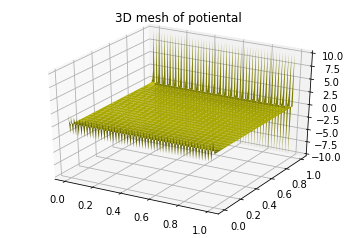

In [34]:
##3D Plot 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = np.linspace(0, 1, 100)
y = np.linspace(0, 1, 100)
X,Y = np.meshgrid(x,y)

plt.title("3D mesh of potiental")
ax.plot_surface(X, Y, soln_step, rstride=4, cstride=4, color='y')

<a list of 1 text.Text objects>

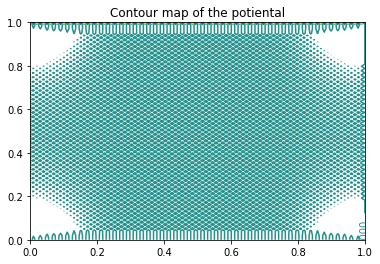

In [35]:
##Contour Map 
x = np.linspace(0, 1, 100)
y = np.linspace(0, 1, 100)
X,Y = np.meshgrid(x,y)

plt.figure()
CS = plt.contour(X, Y, soln_step)
plt.title("Contour map of the potiental")
plt.clabel(CS, inline=1, fontsize=10)

Because of the intial condition, there is a lot of local max and min. This could be potientally due to the size of the mesh (100x100 seems a little large for this application, but I stick by it). I suspect that the potiental would look less like a hair comb if it was allowed to iterate further and continue to smooth out the potiental to a more uniform convergence. 

I'm also sorry about how many spelling errors are in this 